# Lecture 3: Exploring Probability

We pretty much always want to start notebooks with standard imports like these and a %matplotlib magic command to make sure figures show up in the notebook:

In [3]:
%matplotlib inline   
                     # this sets up matplotlib to make plots show up in the notebook
import numpy as np   # imports the numpy package, abbreviated as np
import matplotlib    # imports the matplotlib package for making plots
import matplotlib.pyplot as plt    # imports the part of matplotlib we use most,
                                   #abbreviated as plt

## More work with modules

You should have put the function from lecture2.ipynb in a file we can use as a module.  Our code was:


    import numpy.random as random
    import numpy as np
    
    def sim2coins(ntests):
        # simulate ntests tosses of 2 coins 
        ntests=int(ntests)
        coin1=random.rand(ntests) > 0.5
        coin2=random.rand(ntests) > 0.5
        return np.sum( coin1 == coin2 )/ntests
        
You should have placed this in a file named sim2coins.py .     

__Next import and test your code: change the number of simulations below.__

In [4]:
import sim2coins as s2c
from importlib import reload
reload(s2c)

ntests = 5E4
print(s2c.sim2coins( int(ntests) ) )

0.24842


__Now, modify sim2coins to check for the fraction of cases where coin1 is tails (==False) and coin2 is heads (==True).  Run that code below.__  Note that you will need to use `np.logical_and`; you can also get help on it in the code box below, using ?.  For convenience, you should also make it convert ntests to an integer using the `int()` function.

In [5]:
print(s2c.sim2coins( int(1000) ) )

0.25


Python will automatically compile a module the first time you import it.  However, to save time it won't automatically recompile a routine after that.  We have to force it to.

To get python to incorporate our changes, just reimporting won't do it.  __Do `reload(s2c)` in the below code box, and test your code again in the box below.__  

(Note: you could also go to the Kernel menu above and choose 'Restart', then the Cell menu above and do 'run all'; but that's overkill).

In [6]:
from importlib import reload
reload(s2c)

<module 'sim2coins' from '/Users/pittsburghgraduatestudent/repos/classes/PHYS3704_DataScience/jupyter_notebooks/sim2coins.py'>

## Testing the frequentist definition of probability

Let's calculate the fraction of successes for different numbers of trials.  __Note there are a couple of items I want you to predict and discuss with your group!__

In [7]:
nsims_list=np.array([100,500,1000,5000,1E4,5E4,1E5,1E6])

nsims_list=nsims_list.astype(int) # this will convert the array to integers all at once

# PREDICT AND DISCUSS:
result=nsims_list*0.
print(result)


[0. 0. 0. 0. 0. 0. 0. 0.]


[-0.08     -0.008     0.006     0.0082   -0.0024   -0.00384  -0.00071
 -0.000478]


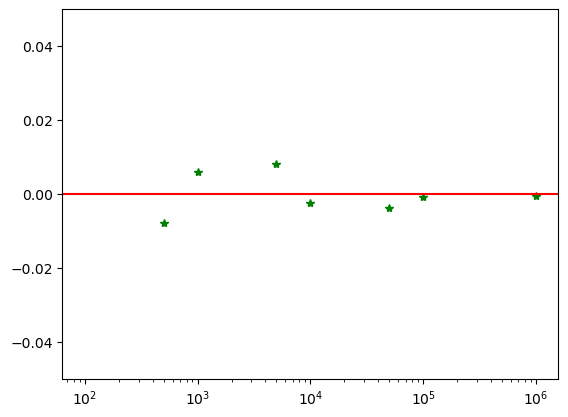

In [8]:
# PREDICT AND DISCUSS:
for i,nsims in enumerate(nsims_list):
     result[i]=s2c.sim2coins(nsims) - 0.25
     plt.plot(nsims,result[i],'g*')
     plt.xscale('log')
     plt.ylim(-0.05, + 0.05)

print(result)
#Plot y = 0
plt.axhline(y=0, color='r', linestyle='-')  # Red horizontal line at y=0

#PUT YOUR CODE FOR PLOTTING IN THIS CODE BOX! 
#WHEN YOU MODIFY TO LOOP THROUGH 20 TIMES, DO THAT IN THIS BOX TOO
#  (MAKE SURE THE PLOT COMMAND IS INSIDE THE LOOP!)


# Plotting and exploring

__In the code cell above, plot the fraction of successes as a function of the number of simulations.__

Now, make a series of modifications:

__1) Plot the result with 0.25 (the expected probability) subtracted from it, as a function of nsims, with the below changes.__
- Plot the points as green stars (look at the help on `plt.plot()` ).  
- Use a logarithmic x axis (look at the help on `plt.xscale` or `plt.semilogx`)
- Use a y axis range from -0.05 to +0.05 (look at the help on `plt.ylim()`)

__2) By adding another, outer for loop, repeat the calculation 20 times, overplotting all the results.__
		If you put all the plot commands in the same code box (within the loop), all the plots will be shown on the same axes, as we want.

__3) Overplot the line y=0 to help guide the eye.__

__Extra: If your group is done and you are waiting around for other groups, add code to overplot the average of all the results at each `nsims` value as a line.  Add labels to your axes and a title to the figure.  Remember that you can type plt. and then hit tab to get a list of all the functions in the `plt` (actually `pyplot`) library.__

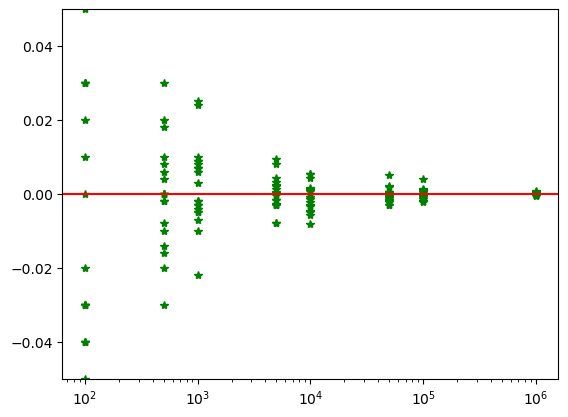

In [9]:
data_dict = {}
for j in range(20):
    for i, nsims in enumerate(nsims_list):
        result[i] = s2c.sim2coins(nsims) - 0.25
        plt.plot(nsims, result[i], 'g*')
        plt.xscale('log')
        plt.ylim(-0.05, + 0.05)
        data_dict[nsims] = np.mean(result)
plt.axhline(y=0, color='r', linestyle='-')  # Red horizontal line at y=0


## Simulating Dice

__Here are 3 ways for generating dice rolls.  Check that they give similar results in the average using np.mean().__ Note that I have not filled in all the code for the `np.ceil()` method as an exercise for you to fill in.

In [10]:
from numpy import random
nsims=1000

#Floor: 
rolls_f=np.floor(random.rand(nsims)*6) + 1 ## Will not do it as an integer data type.  So we do these
                                           ## extra steps. Rounds down by default. +1 is to keep it up
                                           ## to 6.
print(rolls_f)
print(type(rolls_f))
print(rolls_f.shape)
#Round:
rolls_r=np.round(random.rand(nsims)*6 + 0.5) ## .5 is added to make it round up.
#print(rolls_r)

#Ceil:
rolls_c = np.ceil(random.rand(nsims) * 6)
#print(rolls_c)

#Mean of each:
#print(np.mean(rolls_f),np.mean(rolls_r), np.mean(rolls_c))

[1. 5. 4. 1. 6. 1. 2. 6. 3. 2. 5. 4. 2. 6. 3. 3. 3. 6. 5. 1. 1. 1. 3. 5.
 1. 3. 5. 2. 3. 4. 1. 4. 6. 6. 2. 1. 1. 2. 6. 4. 4. 1. 4. 4. 3. 5. 3. 4.
 6. 5. 5. 4. 2. 4. 4. 1. 6. 1. 4. 1. 2. 5. 3. 1. 4. 1. 3. 6. 6. 3. 6. 3.
 3. 6. 3. 2. 3. 3. 6. 6. 3. 5. 2. 1. 5. 2. 1. 3. 4. 6. 3. 3. 2. 2. 3. 3.
 6. 2. 3. 6. 2. 2. 4. 5. 6. 3. 4. 3. 3. 3. 3. 3. 3. 1. 3. 6. 2. 3. 1. 3.
 2. 2. 1. 5. 1. 6. 6. 5. 4. 5. 5. 3. 4. 6. 6. 2. 1. 5. 1. 1. 3. 5. 4. 4.
 6. 5. 1. 2. 5. 1. 2. 6. 6. 2. 1. 3. 1. 1. 1. 5. 1. 4. 2. 5. 5. 4. 6. 4.
 3. 2. 3. 6. 2. 2. 3. 1. 5. 4. 3. 4. 4. 1. 3. 6. 4. 6. 3. 3. 1. 3. 3. 4.
 3. 1. 5. 1. 5. 4. 3. 6. 2. 4. 1. 4. 3. 6. 6. 3. 2. 1. 1. 2. 2. 4. 5. 5.
 4. 4. 4. 3. 5. 1. 4. 1. 5. 3. 3. 4. 6. 5. 6. 5. 3. 3. 6. 3. 5. 6. 2. 6.
 1. 2. 2. 3. 6. 3. 5. 6. 6. 1. 4. 5. 2. 5. 5. 6. 6. 5. 3. 6. 6. 6. 4. 2.
 6. 6. 3. 5. 5. 4. 3. 1. 3. 1. 5. 2. 2. 4. 3. 3. 2. 6. 4. 6. 3. 5. 2. 1.
 4. 5. 3. 4. 3. 5. 5. 2. 5. 1. 1. 1. 4. 5. 6. 3. 3. 2. 4. 4. 3. 5. 5. 2.
 4. 5. 4. 5. 1. 6. 3. 2. 6. 3. 4. 5. 3. 6. 5. 5. 5.

## Plotting histograms

Below we plot a histogram of die rolls.

__In the below code box, use the `bins` and `range` keywords with `plt.hist()` to plot the results in 6 bins, centered at 1,2,3,...6.  This is not how the bins will be set up by default!__  

As usual, you can do `?plt.hist()` to see the help information.

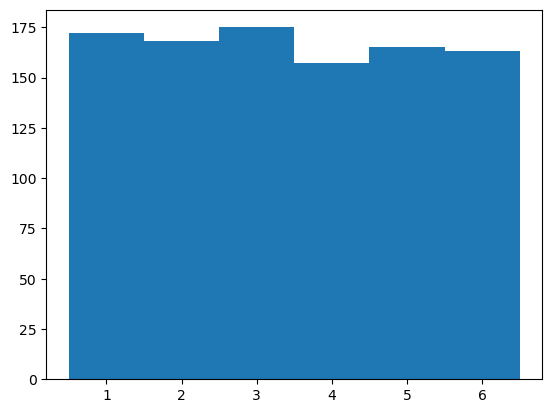

Signature:
plt.hist(
    x: 'ArrayLike | Sequence[ArrayLike]',
    bins: 'int | Sequence[float] | str | None' = None,
    *,
    range: 'tuple[float, float] | None' = None,
    density: 'bool' = False,
    weights: 'ArrayLike | None' = None,
    cumulative: 'bool | float' = False,
    bottom: 'ArrayLike | float | None' = None,
    histtype: "Literal['bar', 'barstacked', 'step', 'stepfilled']" = 'bar',
    align: "Literal['left', 'mid', 'right']" = 'mid',
    orientation: "Literal['vertical', 'horizontal']" = 'vertical',
    rwidth: 'float | None' = None,
    log: 'bool' = False,
    color: 'ColorType | Sequence[ColorType] | None' = None,
    label: 'str | Sequence[str] | None' = None,
    stacked: 'bool' = False,
    data=None,
    **kwargs,
) -> 'tuple[np.ndarray | list[np.ndarray], np.ndarray, BarContainer | Polygon | list[BarContainer | Polygon]]'
Docstring:
Compute and plot a histogram.

This method uses `numpy.histogram` to bin the data in *x* and count the
number of values in eac

In [11]:
plt.hist(rolls_f, bins=6, range=(0.5,6.5))
?plt.hist

# Multi-Dimensional Arrays 

A numpy array need not have only one dimension.  E.g.:

    img = np.zeros( (200,200) )

will create a 200 x 200 array, with zeros everywhere.  

Note: `np.zeros()` and similar routines can take a tuple of dimension sizes as input, for arbitrary numbers of dimensions. 



In [12]:
img = np.zeros( (200,200) )


## Rolling 10 dice

Two options: the slow way and the fast way.  First, some setup:

In [13]:
nsims = int(2E4)
rolls=np.floor(random.rand(nsims,10)*6 ) + 1
print(rolls)


[[1. 3. 1. ... 3. 3. 5.]
 [2. 6. 3. ... 6. 5. 3.]
 [1. 3. 3. ... 3. 4. 1.]
 ...
 [4. 3. 5. ... 4. 1. 1.]
 [1. 1. 3. ... 2. 3. 1.]
 [6. 2. 4. ... 3. 6. 3.]]


In [35]:
%%timeit
total_roll=np.zeros(nsims) 
for i in np.arange(nsims):
     total_roll[i]=np.sum(rolls[i,:])

88.8 ms ± 225 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [36]:
%%timeit
#This code does things the fast way
total_roll=np.sum(rolls,axis=1)


376 μs ± 36.3 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Plotting the results

__Use `plt.hist(total_roll)` to examine the results of your simulation in the below code box... adjust the number of bins and range as necessary to show all the values in the array__ (you may find `np.min()` and `np.max()` helpful)

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 4.000e+00, 8.000e+00,
        1.300e+01, 2.000e+01, 4.100e+01, 6.900e+01, 1.270e+02, 2.240e+02,
        2.540e+02, 4.120e+02, 5.030e+02, 6.810e+02, 8.350e+02, 9.130e+02,
        1.127e+03, 1.246e+03, 1.301e+03, 1.449e+03, 1.428e+03, 1.468e+03,
        1.355e+03, 1.274e+03, 1.113e+03, 9.610e+02, 8.200e+02, 6.390e+02,
        5.310e+02, 3.890e+02, 2.600e+02, 2.130e+02, 1.330e+02, 8.800e+01,
        4.900e+01, 2.000e+01, 1.900e+01, 8.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]),
 array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5

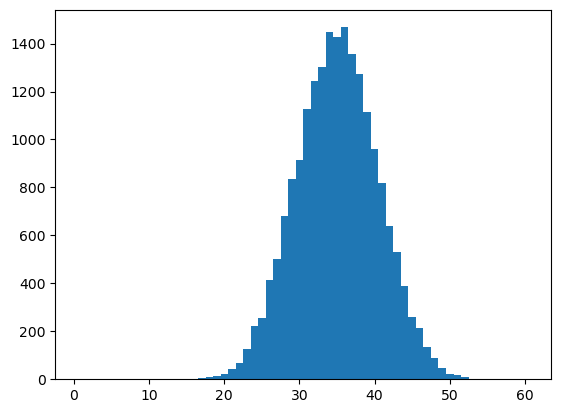

In [43]:
total_roll=np.sum(rolls,axis=1)
plt.hist(total_roll, bins=60, range=(0.5,60.5))

### Simulating more dice

We can just simulate once, and take sums over different subsets with array slicing.

__Modify the below code cell to plot histograms for, 2, 5, 10, and 100 rolls.__

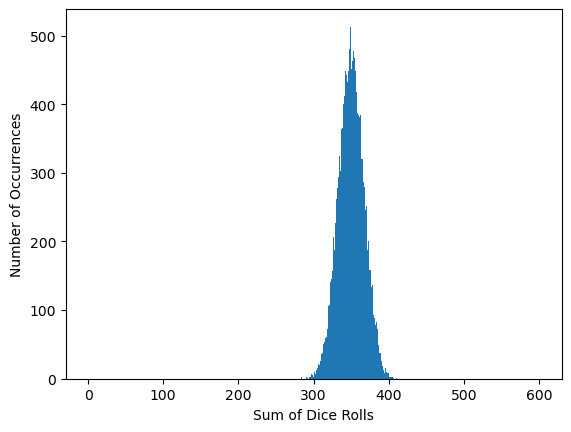

In [33]:
nsims=int(2E4)
n_rolls = 100

rolls=np.floor(random.rand(nsims,n_rolls)*6) + 1

# add up to get results for the sum of 5 die rolls
total_roll_5=np.sum(rolls[:,0:5],axis=1)

#or just go ahead and plot that quantity:
plt.hist(     
    np.sum(rolls[:,0:n_rolls],axis=1),
    range=[0.5, (n_rolls * 6) + 0.5],
    bins= n_rolls*6  # this is a rule of thumb for number of bins    
)

plt.xlabel('Sum of Dice Rolls')
plt.ylabel('Number of Occurrences')
plt.savefig('spam.pdf')

# Saving output to a file

You can use `plt.savefig("<filename>")` in the above code box to store the plot in a file named `<filename>`.

__Save your plot in a PDF file named spam.pdf__.  Then, using the Mac finder/linux file explorer or the below code box, view the file.  In ipython/jupyter, you can issue shell commands by preceding them by '!'.

<Figure size 640x480 with 0 Axes>

In [34]:
!open spam.pdf

# If you have extra time

Try changing one of your plots to use a different font, choosing based upon your own aesthetic preferences.  See the example at http://matplotlib.org/examples/pylab_examples/fonts_demo.html  .

If you find something you like, you may want to change your default font; see http://matplotlib.org/users/customizing.html .

Try rolling even more dice, or plotting the mean roll (using `np.mean`) instead of the sum.